# Homework 3: Text Classification

<div class="alert alert-block alert-warning">Each assignment needs to be completed independently. Never ever copy others' work (even with minor modification, e.g. changing variable names). Anti-Plagiarism software will be used to check all submissions. </div>

## Objectives:

- Learn to use pretrained word vectors
- Use CNN for text classification
- Use RNN for text classification


## Instructions


- Check lab `CNN for text classification` and `RNN` lab before you start working on this assignment. These labs should give you a good starting point.
- Please complete all questions using Jupyter Notebook.
- Please answer all analysis questions using Jupyter Notebook Markdowns or in a separate pdf file (if you don't know how to write Markdowns).
- Please run your Jupyter Notebook to get all training histories and plots, save the notebook to pdf file, and sumbit the pdf file along with the Jupyter Notebook


In [ ]:
#! pip install torchinfo

In [ ]:
import pandas as pd

# add your import statement

## Q1: CNN for Text Classification

In this task, we'll use CNN to detect emotion from text. The dataset is taken from https://www.kaggle.com/datasets/ishantjuyal/emotions-in-text.


The following scripts show you how to load the data and split the samples into training, evaluation, and test.

### Load Data

In [4]:
import pandas as pd
from sklearn.utils import shuffle


In [5]:
data = pd.read_csv("Emotion_final.csv")
data.head()
len(data)

data = shuffle(data)

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


21459

In [6]:
# Map text label to numbers

label_map = {'fear':0, 'happy':1, 'anger':2, 'surprise':3, 'sadness':4, 'love':5}
data["label"] = data.Emotion.apply(lambda x: label_map[x])
data.head()
data.label.value_counts()

,Text,Emotion,label
5829,i just didn t end feeling satisfied,happy,1
9620,i honestly feel a bit pressured she just made ...,fear,0
2271,i feel if not resolved soon enough will have a...,happy,1
3847,i was just yesterday feeling uncomfortable wit...,fear,0
16121,made a wonderfull new friend,happy,1


label
1    7029
4    6265
2    2993
0    2652
5    1641
3     879
Name: count, dtype: int64

In [7]:
# Split dataset into training, evaluation, and test

train_data = data.iloc[0: 15000]
eval_data = data.iloc[15000: 18000]
test_data = data.iloc[18000: ]

### 1.1. Preprocess Text

Write a function `preprocess(train_data, eval_data, test_data)` to convert the three sample subsets into three datasets so that you can use it for model fitting. 
- This function has the three sample subsets as inputs
- During preprocessing, do the following:
    1. Tokenize each document into words
    1. Map every unique word in the vocabulary into an index (i.e. `word index`)
    1. Convert each document into a sequence of word indexes with uniform length by padding short ones and truncating long ones.
    1. Create Torch datasets for the subsets that can be directly used for training
- Return the datasets and also the word-index dictionary 


When you preprocess the text, `carefully explain how you choose the following hyperparameters`:
- Vocabulary size (i.e. the total number of words)
- Maximum sentence length


Feel free to use Keras pacakage to process text (https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)

In [9]:
class Emotion_dataset(Dataset):
   
    # Add your code


In [24]:
def preprocess(train_data, eval_data, test_data, {any other arguments you need}):
    
    # Add your code to transform data into datasets
    
    return train_dataset, eval_dataset, test_dataset

### 1.2. Model

Define a CNN model for this classification task. You model should provide options to configure  Convolution layer:
- Number of filters
- Filter sizes


In [39]:
class cnn_text(nn.Module):

    # add your code to define the model

### 1.3. Train

First, carefully choose the hyperparameters for convolution layers. You can reuse the training function to train the model. 

Notice that you have an imbalanced dataset. To understand which classes underperform, modify the training function to print out a classification report which display the precision, recall, and f1 for each class (see function https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).


If your models are properly configured, `your test macro F1 should be around 85%`. 

In [64]:

def train_model(model, train_dataset, eval_dataset, test_dataset, device, 
                optimizer, epochs=30, batch_size=64):
    
   # add your code to train model and test model

Training Start
Epoch:1 / 100, train loss:1.6688,        train_acc:0.3164, valid loss:1.5239 valid acc:0.4106
model saved!
Epoch:2 / 100, train loss:1.5281,        train_acc:0.3894, valid loss:1.4637 valid acc:0.4506
model saved!
Epoch:3 / 100, train loss:1.4348,        train_acc:0.4377, valid loss:1.3646 valid acc:0.4996
model saved!
Epoch:4 / 100, train loss:1.2873,        train_acc:0.5140, valid loss:1.2003 valid acc:0.5607
model saved!
Epoch:5 / 100, train loss:1.0981,        train_acc:0.5982, valid loss:0.9693 valid acc:0.6645
model saved!
Epoch:6 / 100, train loss:0.8929,        train_acc:0.6848, valid loss:0.7685 valid acc:0.7355
model saved!
Epoch:7 / 100, train loss:0.6996,        train_acc:0.7590, valid loss:0.5981 valid acc:0.7971
model saved!
Epoch:8 / 100, train loss:0.5565,        train_acc:0.8087, valid loss:0.4908 valid acc:0.8331
model saved!
Epoch:9 / 100, train loss:0.4495,        train_acc:0.8491, valid loss:0.4218 valid acc:0.8497
model saved!
Epoch:10 / 100, train 

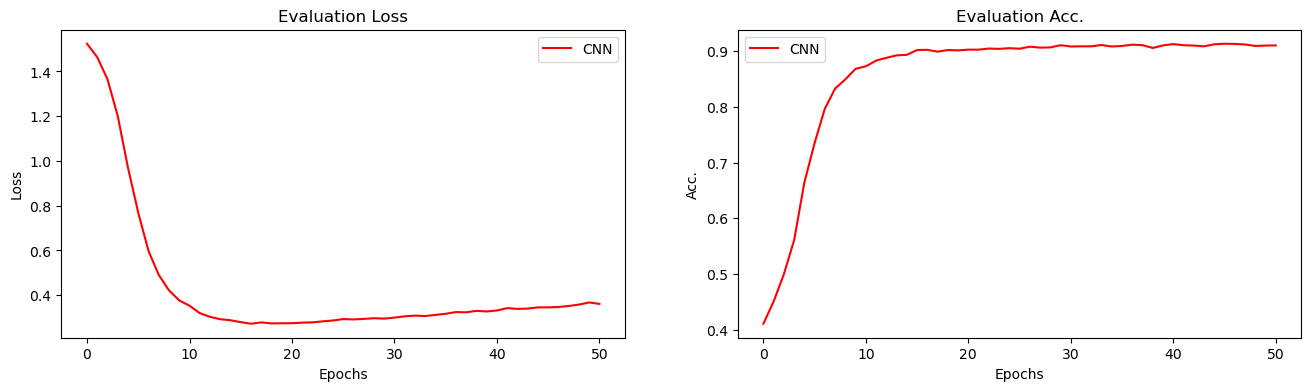

In [67]:
# Train model

# This is an example training log

## Q2: RNN for Text Classification

Define a RNN model (LSTM or GRU) to classify emotion. Then you train the model as before.

Your test macro F1 score should be around 80%

### Model

In [68]:
class rnn_text(nn.Module):

  # Define the model

### Train

In [ ]:
# Train model

## Q3: RNN-CNN for Text Classification

Modify your model in Q1 to add a RNN layer before CNN. Train the model.

Your test macro F1 should be around 85%.

In [72]:
class rnn_cnn_text(nn.Module):

    
     # Add your code

In [ ]:
# Train model

## Q4 (Bonus)

So far you have initialized the embedding layer randomly and trained the word embedding from scratch. A recommended practice is to use pretrained word vectors. Choose a pretrained word vectors (e.g., glove, BERT) and redo Q1-3. Your objective is to increase the test macro F1 by at least 2%.

Please answer the following questions:
- Which pretrained embeddings works the best?
- Which model benefits significantly from  the pretrained embedding?
- How did you use the pretrained embedding? Use it as-is or allow fine tunning?